<a href="https://colab.research.google.com/github/HarukiHenrike/BasesComputacionais/blob/master/ProjetoBCCDanielZamboniElesb%C3%A3oeLuizHenriquedaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Final da Disciplina Bases Computacionais da Ciência Q3.2022 21h

Daniel Zamboni Elesbão - RA: 11202230222

Luiz Henrique da Silva - RA: 11202231412

Disciplina de base para o projeto: 

"Estado e Relações de Poder"

Fontes de dados oficiais do projeto:

https://www.transparency.org/en/cpi/2021

https://hdr.undp.org/data-center


In [3]:
# Estudo estatístico comparativo entre o Índice de Desenvolvimento Humano (IDH ou HDR na sigla em inglês) das 
# Nações Unidas e o Índice de Percepção da Corrupção (CPI) da Transparência Internacional
# Projeto com inspiração na disciplina 'Estado e Relações de Poder'
import matplotlib.pyplot as plt # importa a biblioteca mathplotlib como plt
import pandas as pd # importa a biblioteca pandas como pd
hdr21 = pd.read_csv('https://raw.githubusercontent.com/daniel-elesbao/BasesComputacionais/master/HDR21-22_Composite_indices_complete_time_series.csv')
# Lê o CSV com o ranking do Índice de Desenvolvimento Humano das Nações Unidas de 2021
cpi21 = pd.read_excel('https://raw.githubusercontent.com/daniel-elesbao/BasesComputacionais/master/CPI2021_GlobalResults&Trends.xlsx')
# Lê planilha Excel com o índice de percepção de corrupção da transparência internacional de 2021
cpi21 = cpi21.drop(labels=[0,1], axis=0) # remove as duas primeiras linhas do DataFrame, sem dados relevantes
cpi21 = cpi21.rename(columns={'Unnamed: 1': 'ISO3','Unnamed: 3': 'CPI'}) # renomeia as colunas com as informações relevantes
descor = pd.merge(cpi21, hdr21, left_on='ISO3', right_on='iso3') # funde os Dataframes alinhando os dados dos países pela padronização do nome ISO3
descor = descor[['ISO3','CPI','iso3','hdi_rank_2021']] # remove todas as colunas exceto as que tem as informações relevantes para o escopo do projeto
descor = descor.dropna(axis = 0) # remove os valores vazios de países que por motivos políticos não tiveram os dados de HDI apurados.
descor['CPI'] = descor['CPI'].astype(float) # converte os valores da CPI para float, para poder realizar os cálculos

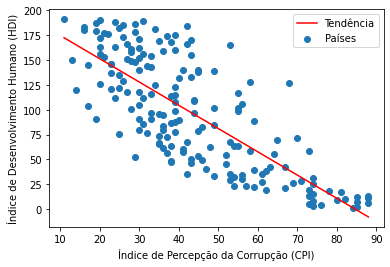


 A correlação entre o Índice de Percepção da Corrupção e o Índice de Desenvolvimento Humano é -0.772


In [4]:
import pandas as pd # importa a biblioteca pandas como pd
import numpy as np # importa a biblioteca numpy como np
import matplotlib.pylab as plb # importa a biblioteca mathplotlib como plt

X = descor["CPI"] # Coluna CPI da tabela usada como coordenada X
Y = descor["hdi_rank_2021"] # Coluna hdi_rank da tabela usada como coordenada Y

media_X = np.mean(X) # média do X
media_Y = np.mean(Y) # média do Y
erro_x = X-media_X # Cálculo dos erros de X
erro_y = Y-media_Y # Cálculo dos erros de Y
soma_erro_xy = np.sum(erro_x*erro_y) # Somando o produto dos erros (faz parte da formula)
erro_x_quadratico = (X-media_X)**2.0 # Encontrando o x quadratico (faz parte da formula)
soma_erro_x_quadratico = np.sum(erro_x_quadratico) # Soma para ter o denominador completo (faz parte da formula)
m = soma_erro_xy / soma_erro_x_quadratico # formula anteriormente mencionada (coeficiente angular)
c = media_Y - m*media_X  # Formula para coeficiente linear
reta = m*X+c # Equação usando os coeficientes anteriormente calculados para chegar na reta

plt.scatter(X,Y,label='Países'); # Países separados por pontos no grafico 
plt.plot(X,reta,label='Tendência',color='red'); # Ajuste linear
plt.xlabel('Índice de Percepção da Corrupção (CPI)'); # Da um titulo ao X 
plt.ylabel('Índice de Desenvolvimento Humano (HDI)'); # Da um titulo ao Y 
plt.legend(); # Insere legenda no grafico
plt.show() # Exibe o gráfico

corr = descor['CPI'].corr(descor['hdi_rank_2021']) # Calcula a correlação
print(f'\n A correlação entre o Índice de Percepção da Corrupção e o Índice de Desenvolvimento Humano é {corr:.3f}') # Exibe a correlação

O resultado negativo da correlação indica uma relação inversa, ou seja, quanto maior a corrupção menor o índice de desenvolvimento humano e vice-versa. O resultado de aproximadamente 0,77 indica uma correlação forte.
https://pt.wikipedia.org/wiki/Coeficiente_de_correlação_de_Pearson

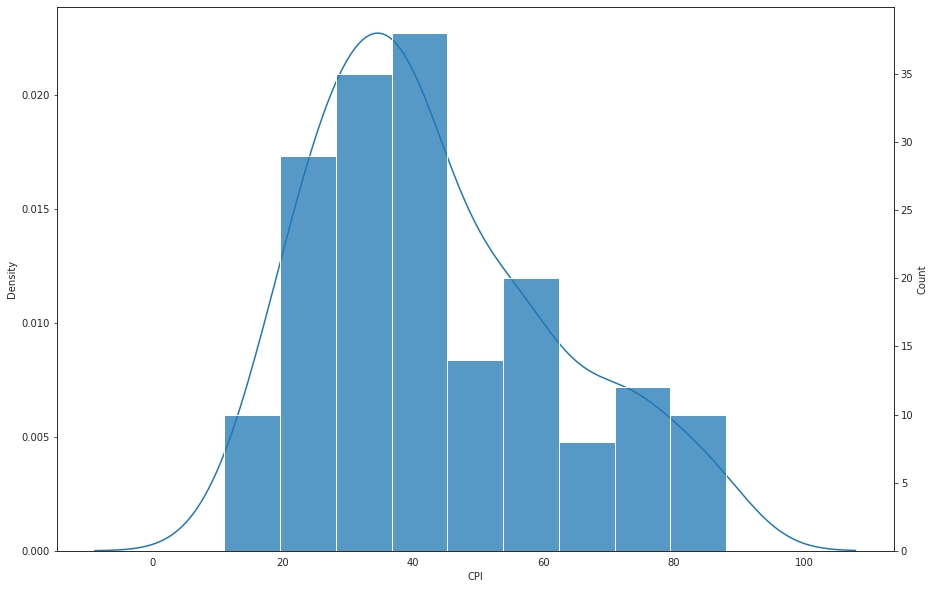

In [5]:
import pandas as pd #importa a biblioteca pandas como pd
import seaborn as sns #importa a biblioteca seaborn como sns
import matplotlib.pyplot as plt #importa a biblioteca mathplotlib como plt

bins = 175 # Numero de colunas plotadas


sns.set_style("white") # Formatação do ambiente do gráfico 
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

g1 = sns.kdeplot(data=descor, x="CPI") # Insere curva KDE (Kernel Density Estimation)

ax_copy = ax.twinx() # Possibilita a formatação da segunda curva sem alteração da primeira

g2 = sns.histplot(data=descor, x="CPI") # Insere histograma

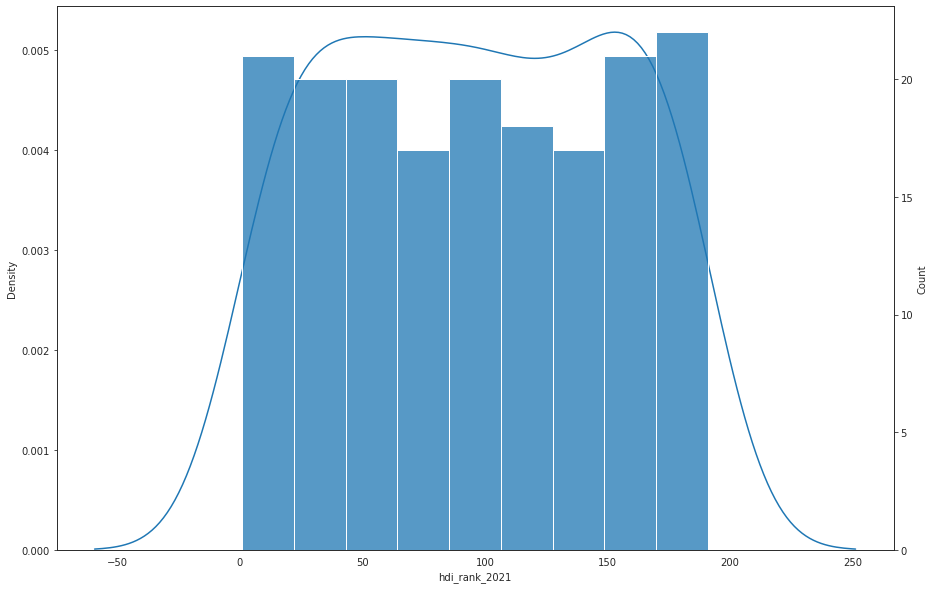

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = 200 # Numero de colunas plotadas


sns.set_style("white") # Formatação do ambiente do gráfico 
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

g1 = sns.kdeplot(data=descor, x="hdi_rank_2021") # Insere curva KDE (Kernel Density Estimation)

ax_copy = ax.twinx() # Possibilita a formatação da segunda curva sem alteração da primeira

g2 = sns.histplot(data=descor, x="hdi_rank_2021") # Insere histograma



In [138]:
df = descor[['ISO3','CPI']]
A = input("Digite uma das opções: moda, minimo, outlier, maximo:    ")

if A == 'minimo':
  print(df.apply("min"))
  
elif A == 'moda':
    print(df.apply("mode").head(2))

elif A == 'maximo':
  print(df.apply("max"))

elif A == 'outlier':
  print(df.apply("mad"))
else: 
  print('Opção invalida')

Digite uma das opções: moda, minimo, outlier, maximo:    minimo
ISO3     AFG
CPI     11.0
dtype: object
